In [3]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 1.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.3 MB 2.6 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.3 MB 2.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.3 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 1.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.3 MB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.6

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import os

In [5]:
file =r"C:\Users\Dawood MD\OneDrive\Desktop\Codsoft\Task_5_CredIt_Card_Fraud_Detection\creditcard.csv"

In [7]:
import chardet
with open(file,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [8]:
df = pd.read_csv(file,encoding='ascii')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
df.shape

(284807, 31)

In [12]:
df.size

8829017

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
df.duplicated().sum()

1081

In [17]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


0    284315
1       492
Name: Class, dtype: int64


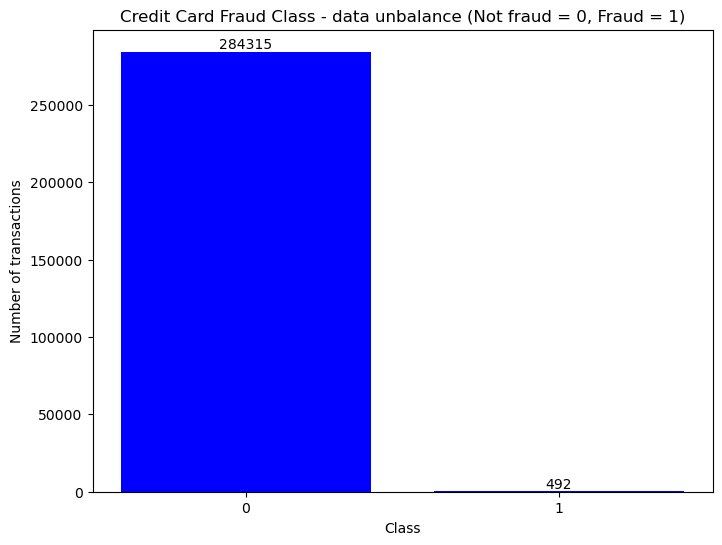

In [20]:
class_count = df["Class"].value_counts()
print(class_count)
class_count_df = pd.DataFrame({'Class': class_count.index, 'values': class_count.values})

plt.figure(figsize=(8, 6))
plt.bar(class_count_df['Class'], class_count_df['values'], color='blue')
plt.title('Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)')
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.xticks(class_count_df['Class'])
for i in range(len(class_count_df)):
    plt.text(class_count_df['Class'][i], class_count_df['values'][i], class_count_df['values'][i], ha='center', va='bottom')
plt.show()

We can see that the data is highly imbalanced with 28315 for class 0 and 492 for class 1

Let's split the data to fraud and not_fraud:

In [23]:
not_fraud = df.loc[df['Class'] == 0]
fraud = df.loc[df['Class'] == 1]

In [24]:
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [25]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

We can see there is a remarkable difference between the mean of the amount of fraud and not_fraud

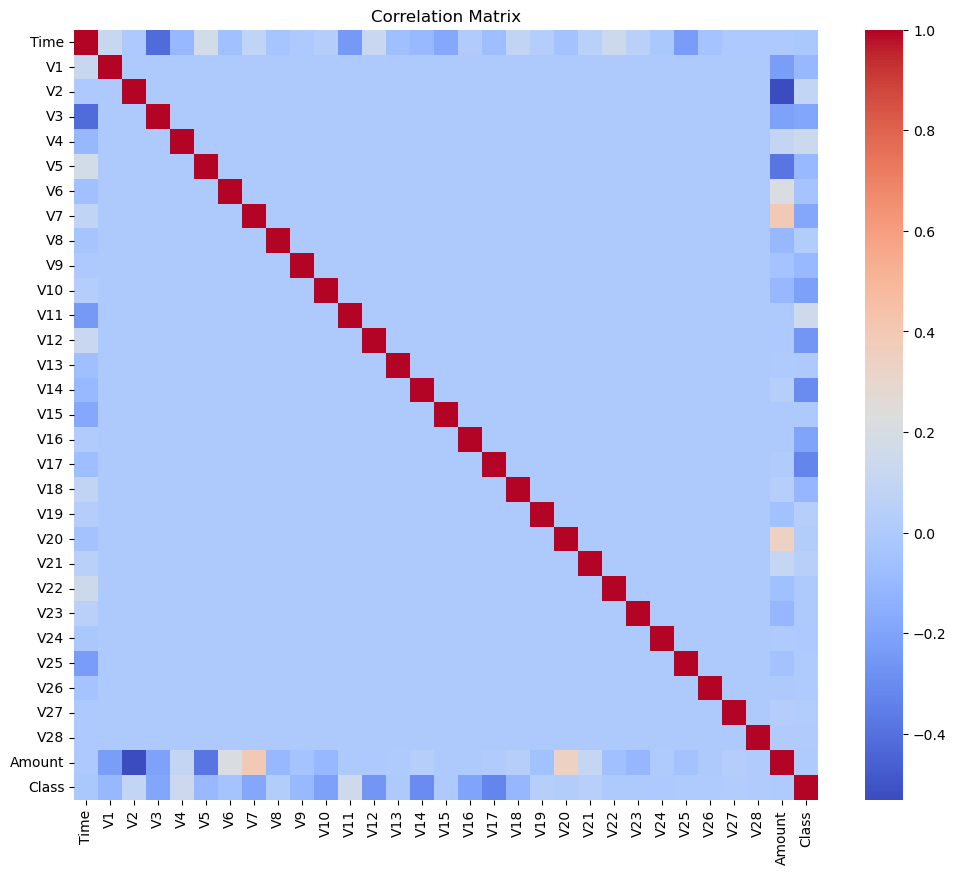

In [28]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

# EDA Data Preprocessing 

Approach to solve unbalanced data

Creating new sample dataset containing same distribution as normal transactions and fraudulent transactions

In [29]:
not_fraud_sample = not_fraud.sample(n=492)

In [30]:
new_dataset = pd.concat([not_fraud_sample, fraud], axis=0)

In [31]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
125454,77680.0,1.012521,-0.761507,0.779622,0.502215,-1.066424,0.252374,-0.724088,0.196418,-1.001770,...,-0.103962,-0.051151,-0.059792,-0.030895,0.234295,-0.296994,0.059623,0.041998,116.00,0
179987,124329.0,-1.051205,1.503146,-0.819398,0.065686,2.792631,3.895603,-0.254604,1.575237,-0.762165,...,-0.070779,-0.235506,-0.362595,0.499392,0.717206,-0.327759,0.265622,0.108880,10.00,0
159538,112615.0,2.048703,-0.056461,-1.320173,0.258954,0.030681,-1.039394,0.130322,-0.267066,0.788961,...,0.287563,0.961860,0.066369,1.050221,0.279171,-0.468364,0.004561,-0.044951,1.00,0
63849,50893.0,-2.078104,1.899315,-0.025059,-0.072667,-0.312456,-0.861534,0.026585,0.696012,-0.125416,...,-0.341320,-0.739334,0.183467,-0.194005,0.082923,0.046130,-0.484263,-0.390870,8.94,0
141166,84157.0,-0.799222,1.260298,1.404679,0.142581,-0.714727,-1.255277,0.351900,0.353034,-0.526327,...,-0.152197,-0.549240,0.123786,0.882899,-0.254830,0.042139,0.134596,0.063575,11.28,0


Splitting the data into Features & Targets by train test split function

In [32]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Model Training and Hyperparameter Tuning

Setting Up the Models and Hyperparameter Grids

In [34]:
#Logistic Regression
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets or when you need a simple model
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Type of regularization
}

In [35]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [36]:
# AdaBoost Classifier
ada = AdaBoostClassifier()
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 1.5]
}

In [37]:
# Categorical Boosting method called cat boost
cat = CatBoostClassifier(verbose=0)
cat_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

In [38]:
# XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [39]:
#LGBoost classifier
lgbm = LGBMClassifier()
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 40, 50],
    'boosting_type': ['gbdt', 'dart'],
    'max_depth': [-1, 10, 20]
}

In [40]:
# HyperparameterTuning
def grid_search(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=3, n_jobs=-1, scoring='roc_auc', verbose=2)
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best ROC AUC for {model.__class__.__name__}: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Random Forest
best_rf = grid_search(rf, rf_param_grid)

# AdaBoost
best_ada = grid_search(ada, ada_param_grid)

# CatBoost
best_cat = grid_search(cat, cat_param_grid)

# XGBoost
best_xgb = grid_search(xgb_model, xgb_param_grid)

# LightGBM
best_lgbm = grid_search(lgbm, lgbm_param_grid)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for RandomForestClassifier: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best ROC AUC for RandomForestClassifier: 0.9819359317785983
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best ROC AUC for AdaBoostClassifier: 0.9776709169664125
Fitting 3 folds for each of 135 candidates, totalling 405 fits


C:\Users\Dawood MD\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
7 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dawood MD\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dawood MD\anaconda3\Lib\site-packages\catboost\core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\Dawood MD\anaconda3\Lib\site-packages\catboost\core.py

Best parameters for CatBoostClassifier: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Best ROC AUC for CatBoostClassifier: 0.9838359411373805
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBClassifier: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.6}
Best ROC AUC for XGBClassifier: 0.9840709407459598
Fitting 3 folds for each of 162 candidates, totalling 486 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bin

Evaluate the Best Models Load Packages and Data

In [41]:
models = {
    'Random Forest': best_rf,
    'AdaBoost': best_ada,
    'CatBoost': best_cat,
    'XGBoost': best_xgb,
    'LightGBM': best_lgbm
}

for name, model in models.items():
    Y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(Y_test, model.predict_proba(X_test)[:,1]):.4f}")
    print(classification_report(Y_test, Y_pred))

--- Random Forest ---
Accuracy: 0.9239
ROC AUC: 0.9764
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        99
           1       0.98      0.87      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

--- AdaBoost ---
Accuracy: 0.9340
ROC AUC: 0.9833
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        99
           1       1.00      0.87      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

--- CatBoost ---
Accuracy: 0.9289
ROC AUC: 0.9841
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        99
           1       0.99      0.87      0.92        98

    accuracy               